In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from src import FTBS, FTCS, crafted_solution, Lp_error, FTBS_2

In [49]:
plt.rcParams['figure.dpi'] = 300

## Rozwiązanie numeryczne modelu Payne'a-Whithama

### Parametry (do dopasowania)

In [50]:
N = 40
T = 102
h = 0.25 # w kilometrach
k = h/150 # w godzinach
rho_max = 20
v_max = 100
tau = 0.1
chi = 120
c0 = 350
l = 3   
m = 1.8

#### Czas i przestrzeń

In [51]:
space = np.linspace(0, h*N, N+1)
time = np.linspace(0, k*T, T+1)

### Warunki początkowe (do dopasowania)

In [52]:
init_rho = 5*np.exp((-(space - 7)**2)/9)
init_v = v_max*(1 - init_rho/rho_max)

### Warunki brzegowe (do dopasowania)

In [53]:
bound_rho_1 = (time>0)*5
bound_v_1 = (time>0)*(-60) + init_v[0]
bound_rho_2 = np.ones(T+1)*init_rho[N]
bound_v_2 = np.ones(T+1)*init_v[N]

#### Rozwiązanie schematem pierwszym

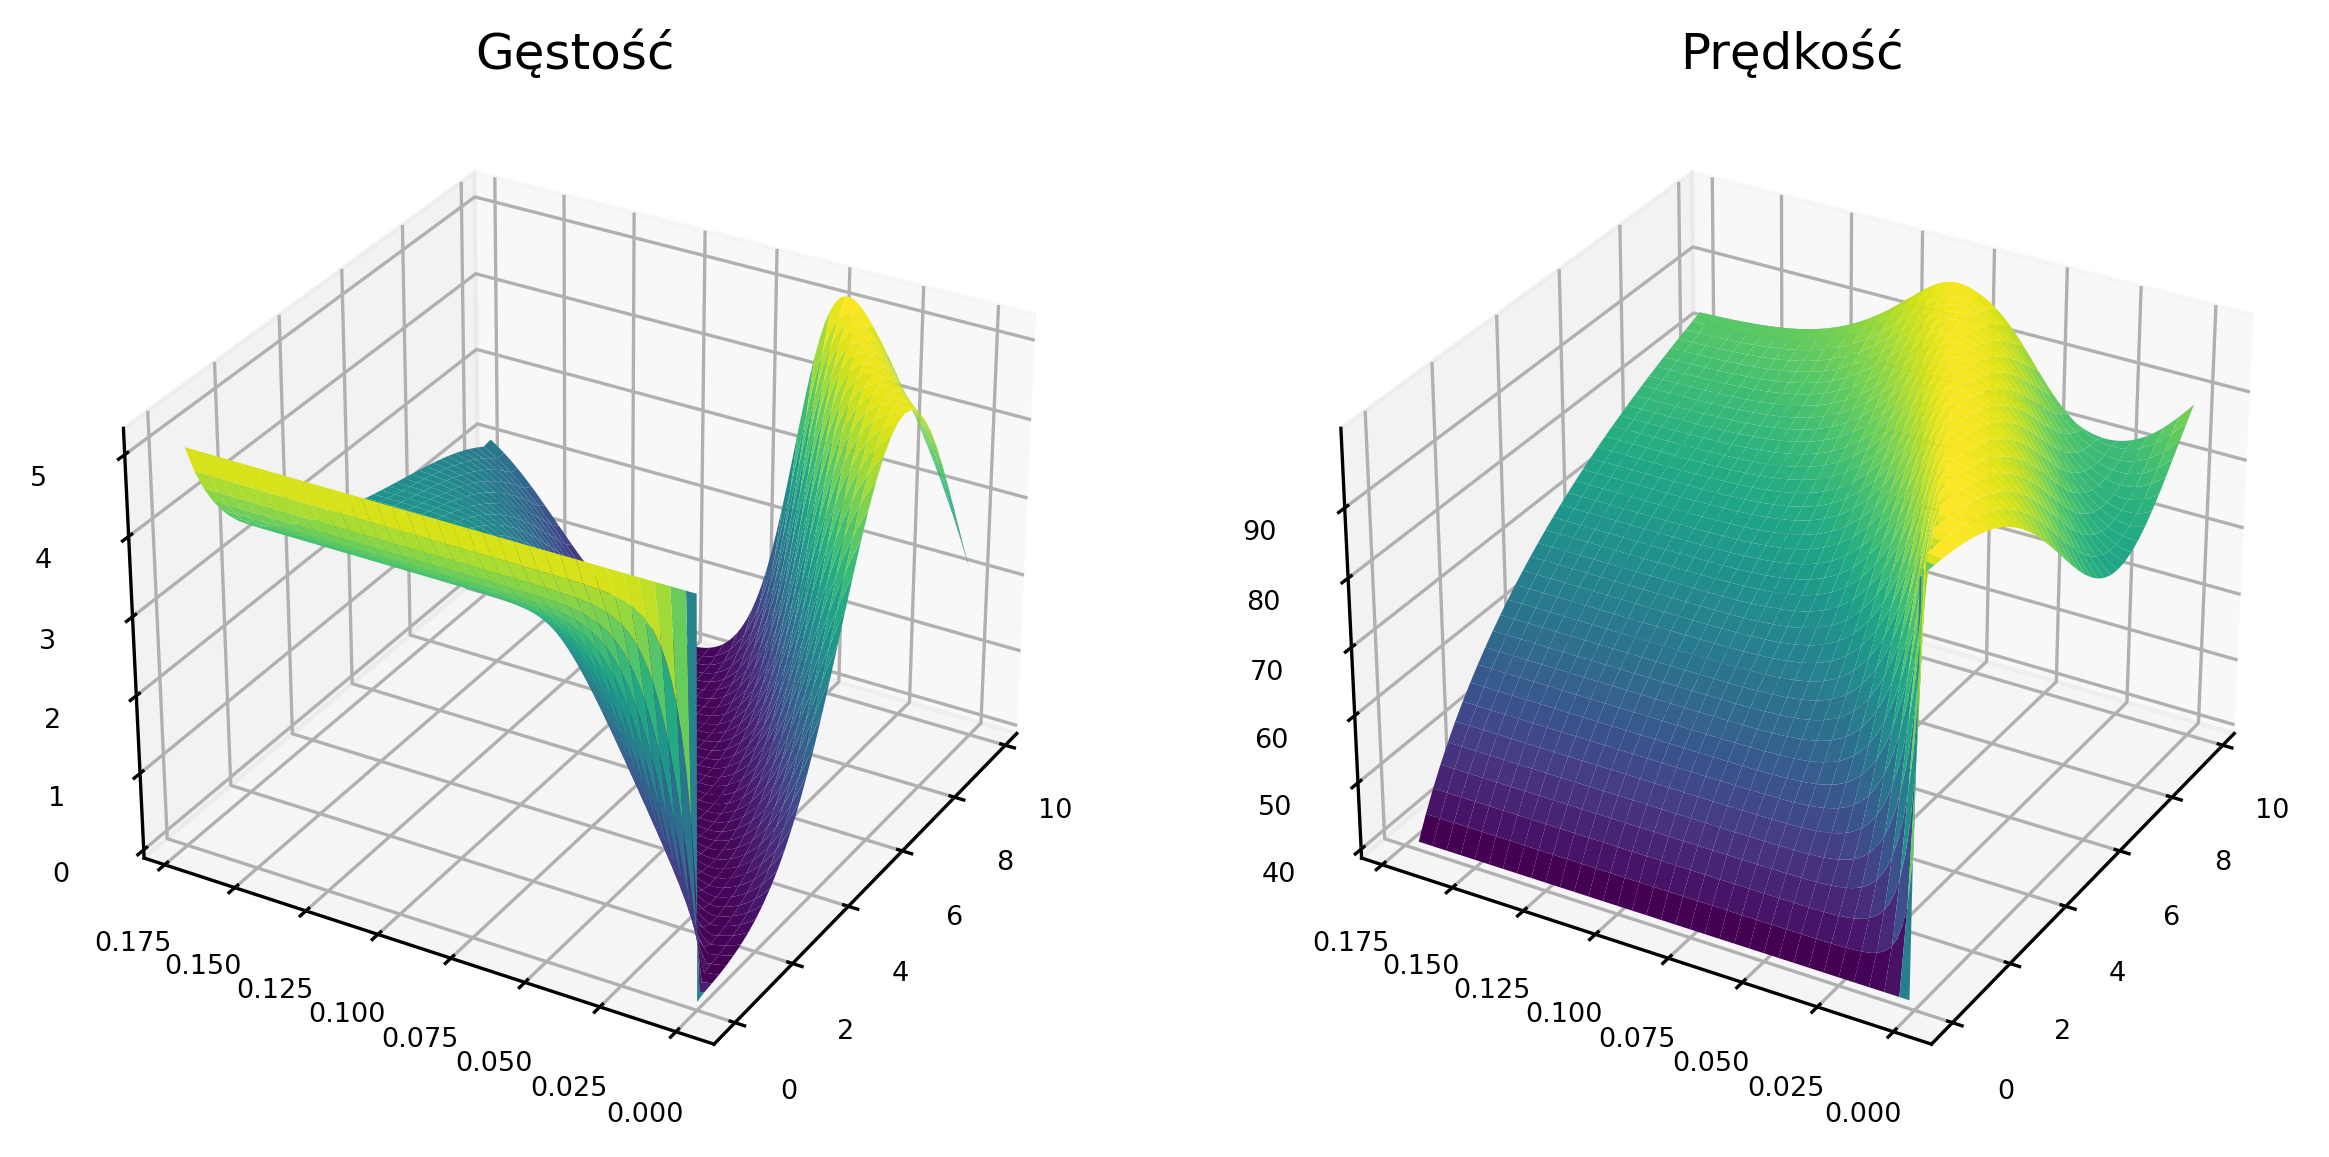

In [54]:
r1, v1, c = FTBS((init_rho, init_v), (bound_rho_1, bound_v_1), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Rozwiązanie schematem drugim

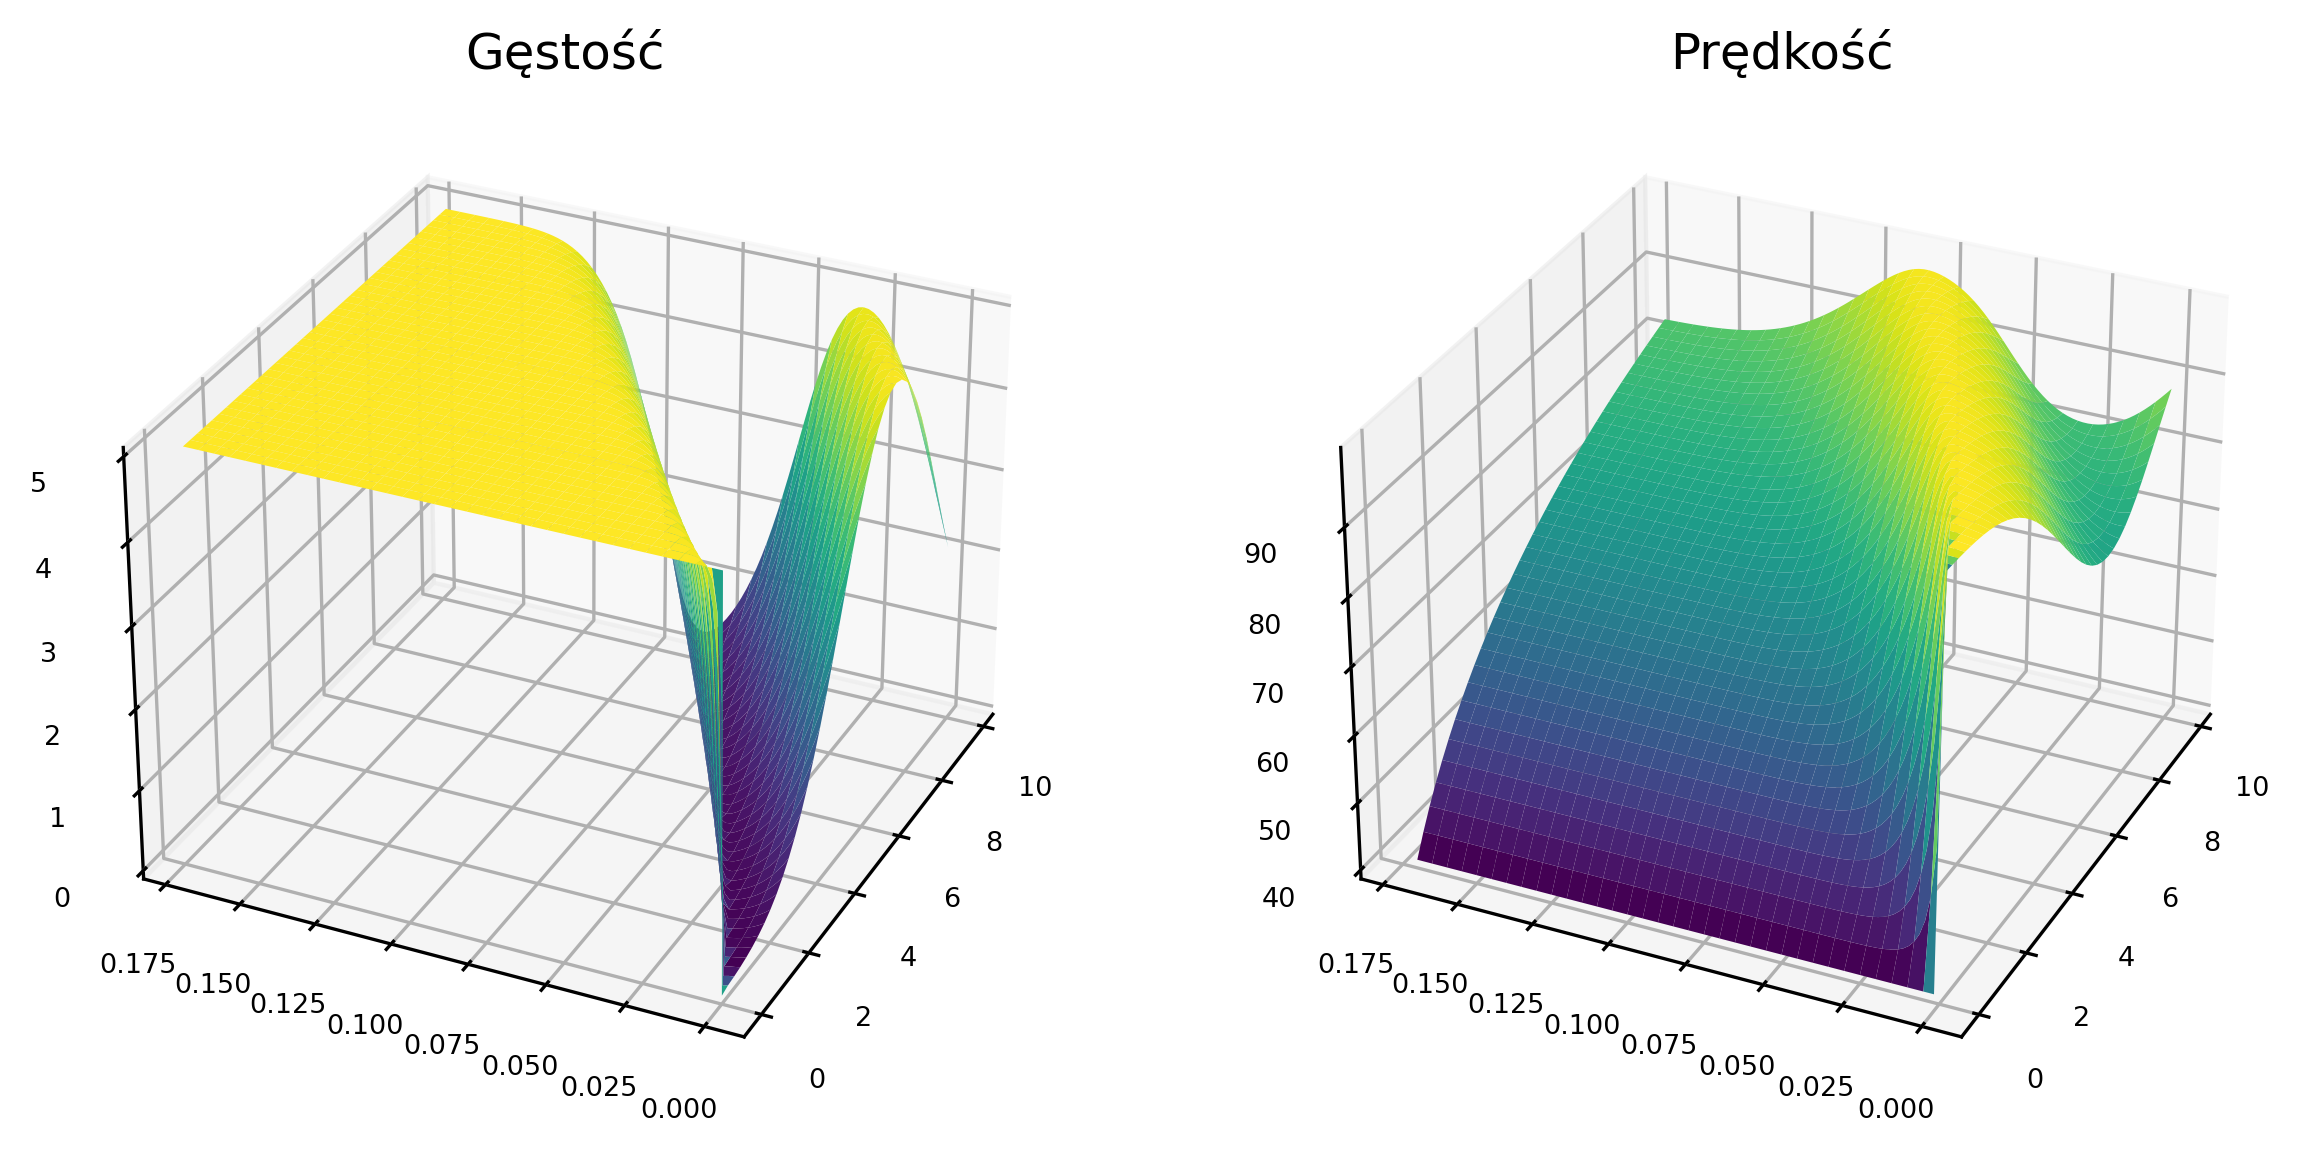

In [55]:
r2, v2, c = FTBS_2((init_rho, init_v), (bound_rho_1, bound_v_1), k, h, rho_max, v_max, tau, chi, c0, l, m)

##### Względna różnica między schematem pierwszym i drugim

In [56]:
print("W normie L1")
print("Gęstość: " + str(Lp_error(r1, r2, h, k)/Lp_error(np.zeros(r1.shape), r1, h, k)))
print("Prędkość: " + str(Lp_error(v1, v2, h, k)/Lp_error(np.zeros(v1.shape), v1, h, k)))
print("W normie L2")
print("Gęstość: " + str(Lp_error(r1, r2, h, k, 2)/Lp_error(np.zeros(r1.shape), r1, h, k, 2)))
print("Prędkość: " + str(Lp_error(v1, v2, h, k, 2)/Lp_error(np.zeros(v1.shape), v1, h, k, 2)))

W normie L1
Gęstość: 0.8821335631333785
Prędkość: 0.007438944178601887
W normie L2
Gęstość: 0.9589555899916018
Prędkość: 0.010324101200702044


#### Rozwiązanie schematem symetrycznym
Ten schemat nie jest zalecany ze względu na niestabilność.

/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:164: RuntimeWarning: invalid value encountered in scalar power
  v[s, t] = v[s, t-1] + k/tau*(v_max*(1 - (rho[s, t-1]/rho_max)**l)**m - v[s, t-1]) \


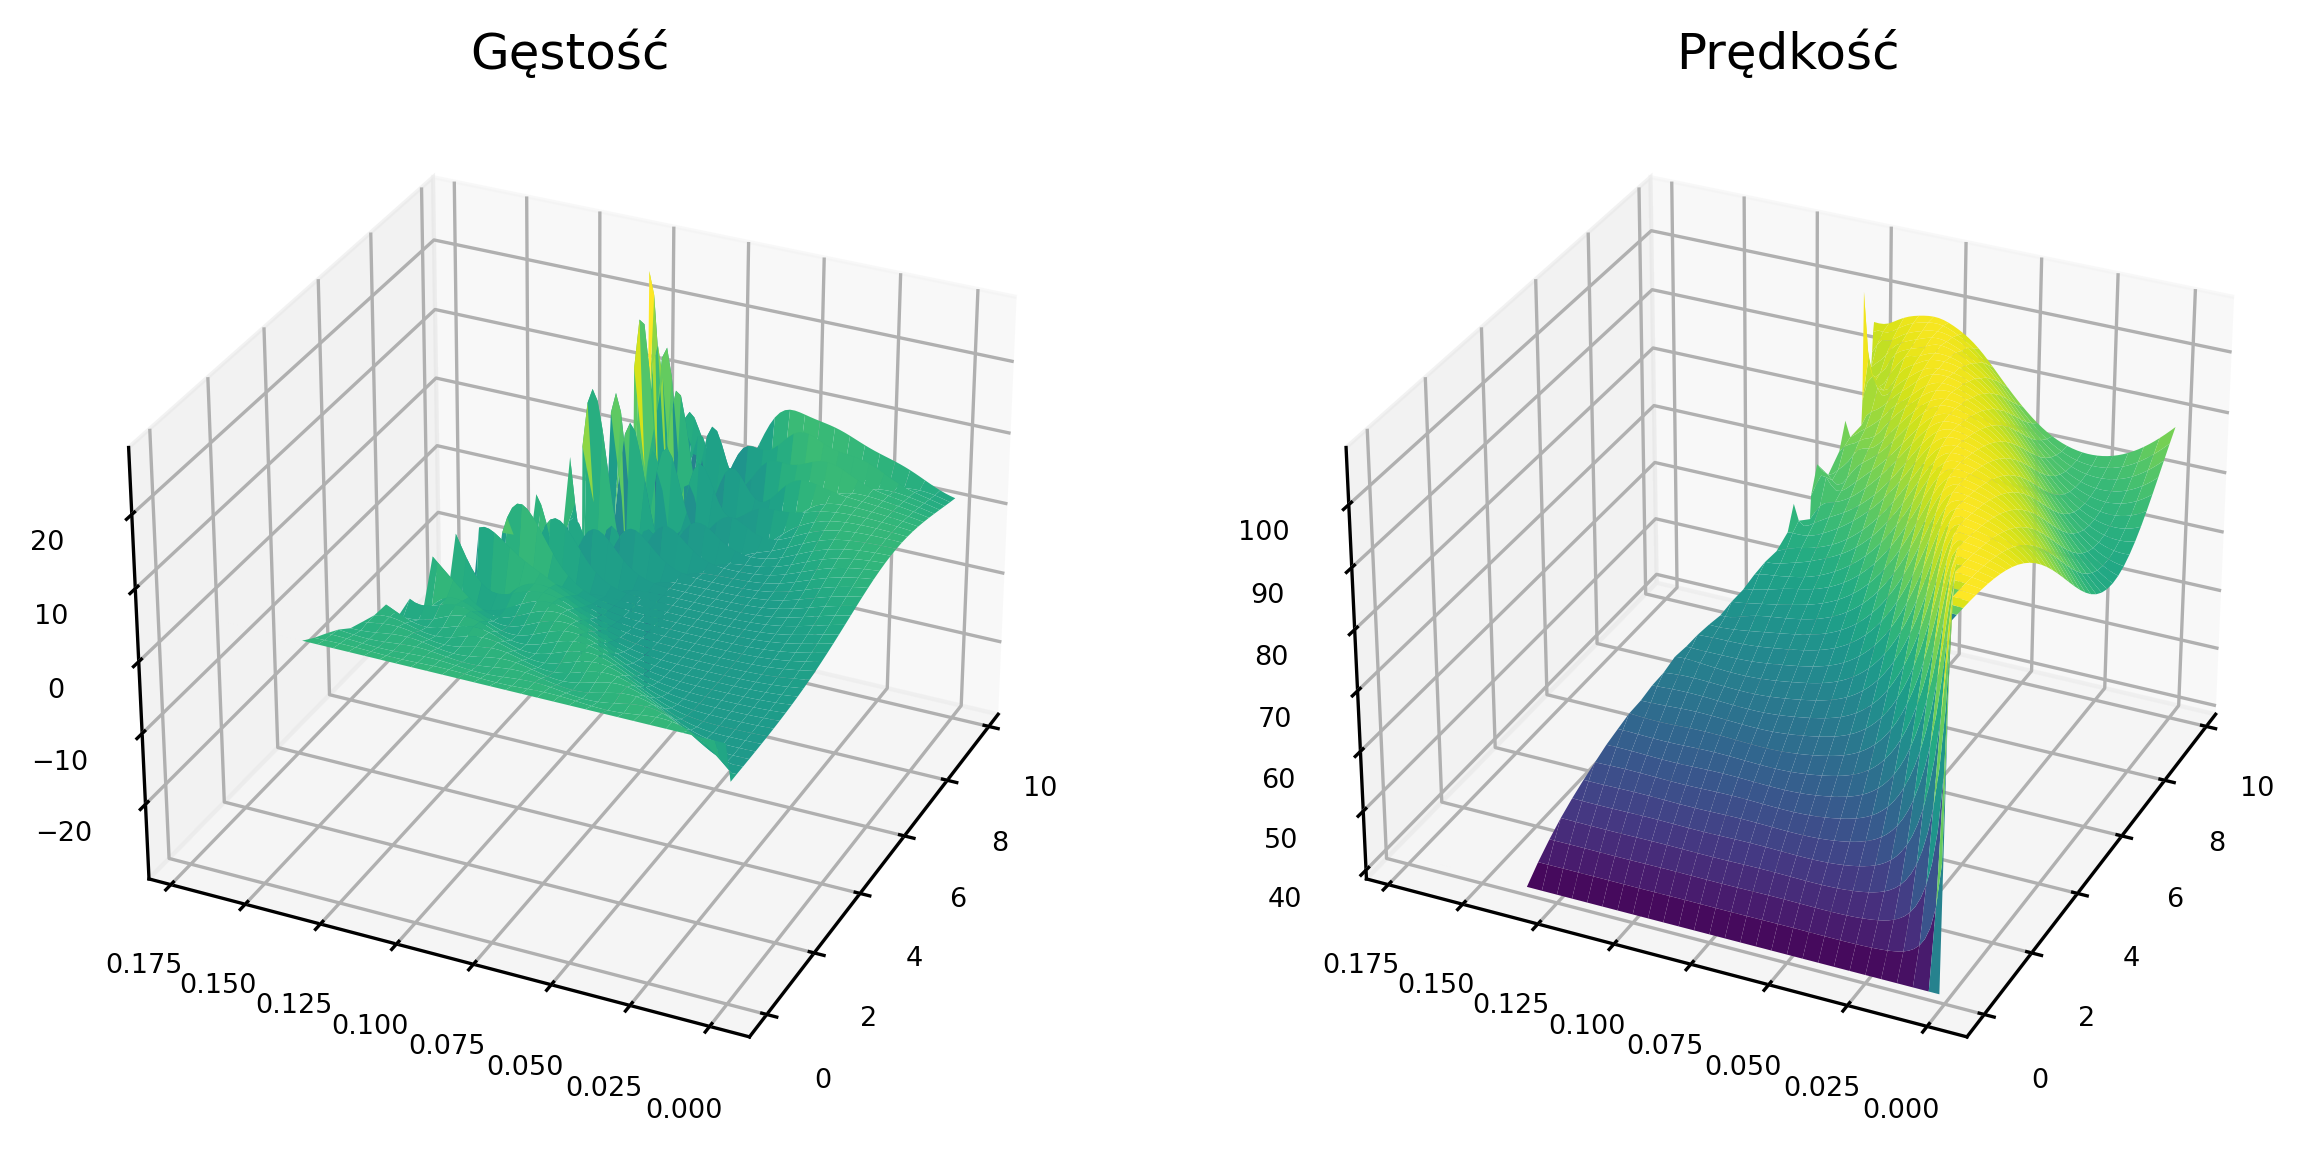

In [57]:
r, v, c = FTCS((init_rho, init_v), (bound_rho_1, bound_rho_2, bound_v_1, bound_v_2), k, h, rho_max, v_max, tau, chi, c0, l, m)

## Testy

Rozwiązanie sztuczne:

\begin{align*}
\rho(x, t) = 20 - \frac{(x - 8)^2}{12} - \frac{(t - 0.15)^2}{0.0016}\\
\rho_{max} = 20, v_{max} = 100\\
v(x, t) = v_{max}(1 - \frac{\rho}{\rho_{max}}) = 5\left[\frac{(x - 8)^2}{12} + \frac{(t - 0.15)^2}{0.0016}\right]
\end{align*}

In [58]:
N = 10
T = 30
k = 1/180 # w godzinach
h = 1 # w kilometrach
rho_max = 20
v_max = 100
tau = 0.1
chi = 120
c0 = 350
l = 1
m = 1

In [59]:
space = np.linspace(0, h*N, N+1)
time = np.linspace(0, k*T, T+1)

#### Wizualizacja sztucznego rozwiązania

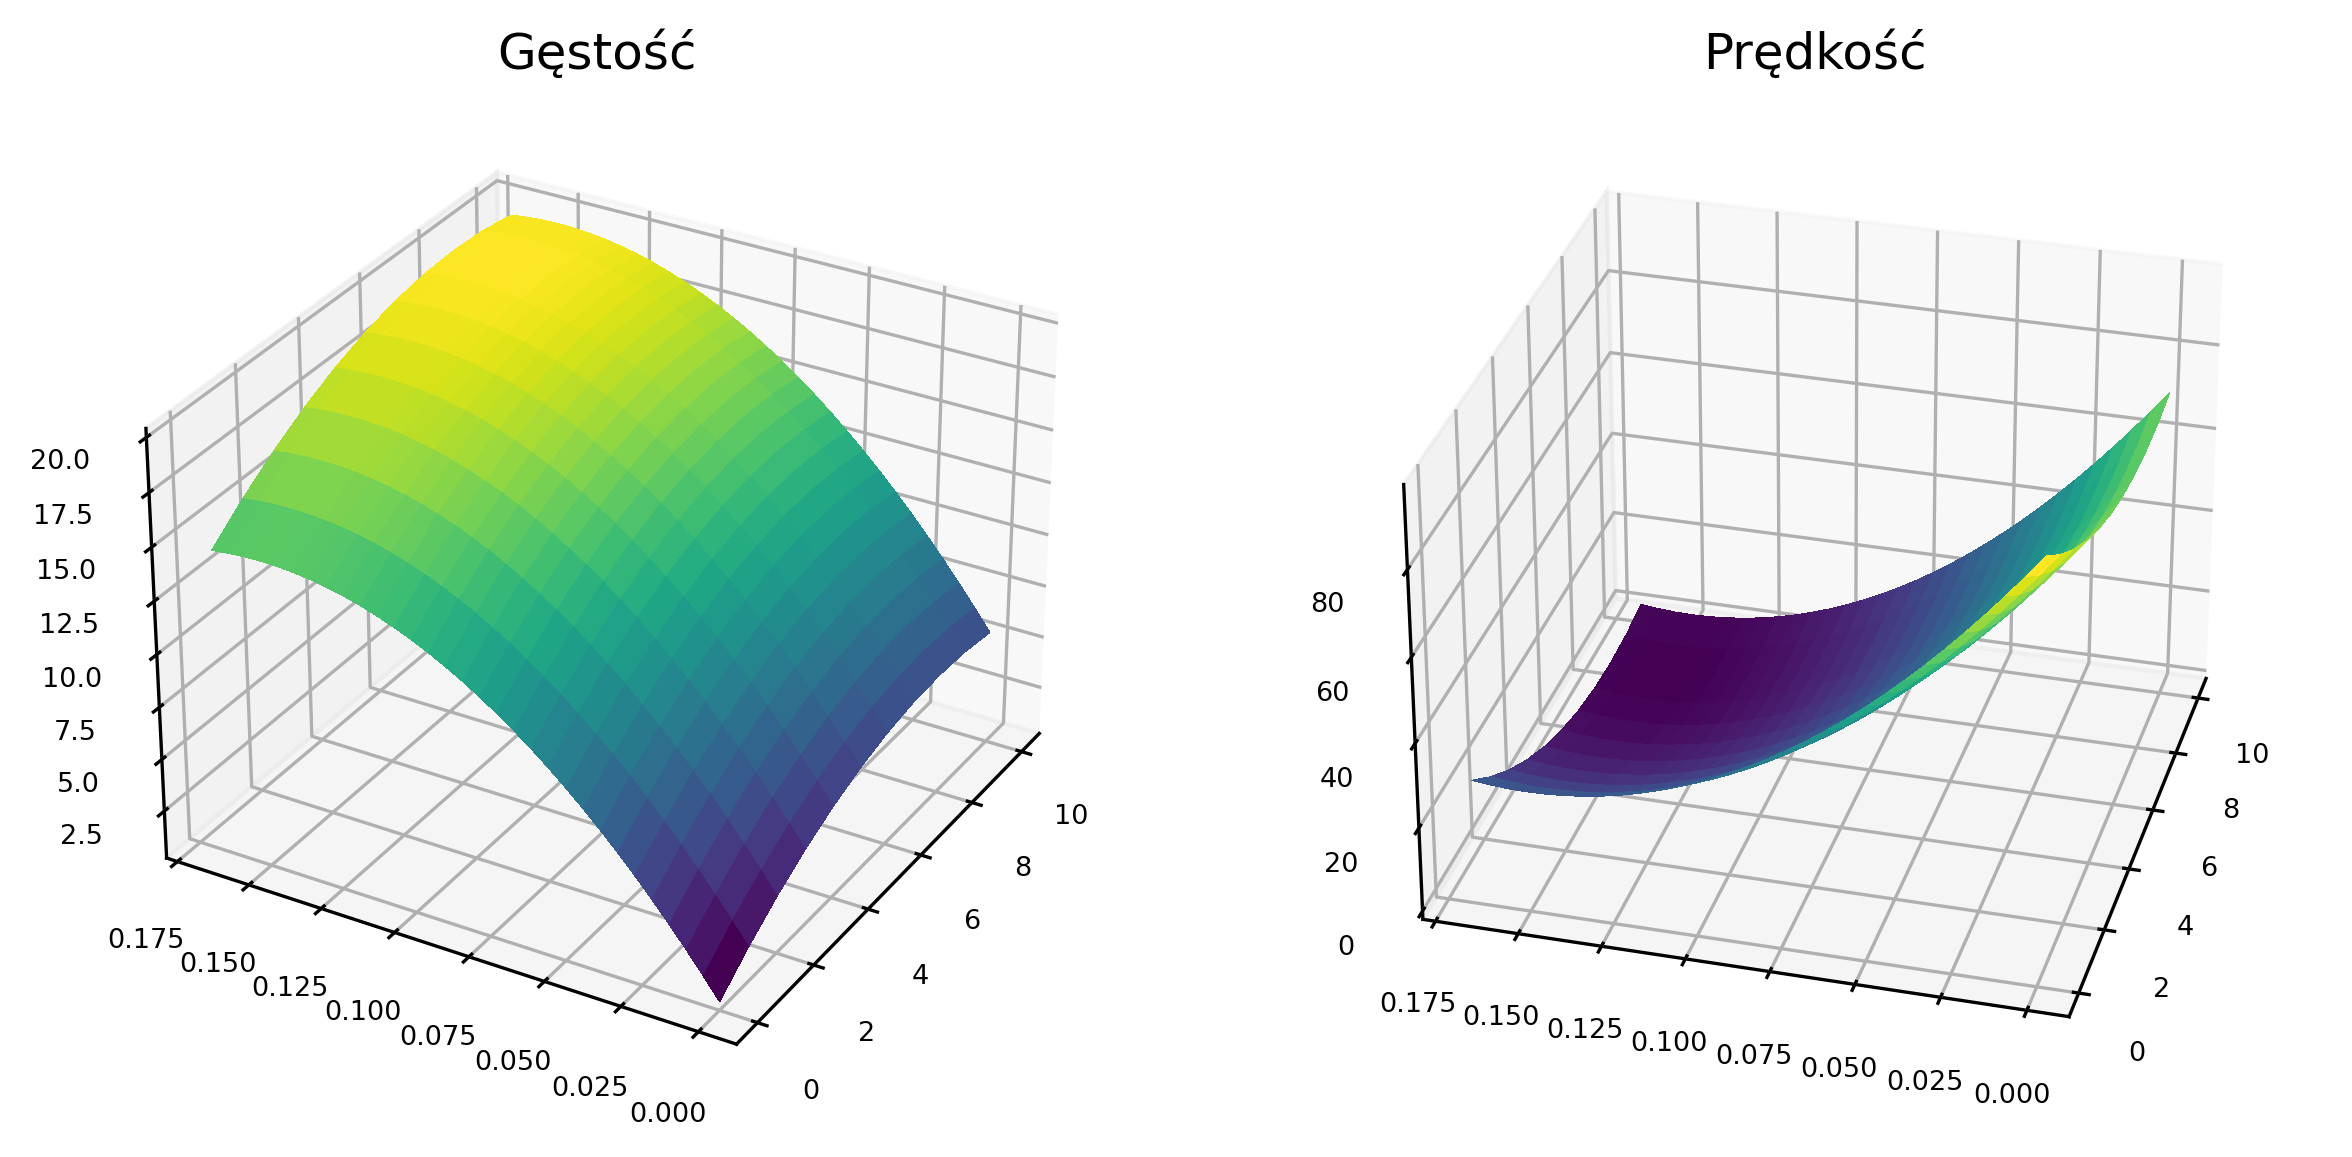

In [60]:
S, T = np.meshgrid(space, time)
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

U = 20 -(S - 8)**2/12 - (T - 0.15)**2/0.0016
V = 100*(1 - U/20)
ax.plot_surface(S, T, U, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=-150)
ax.set_title('Gęstość')
ax.tick_params(axis='both', which='major', labelsize=6.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(S, T, V, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=-165)
ax.set_title('Prędkość')
ax.tick_params(axis='both', which='major', labelsize=6.5)

plt.show()

In [61]:
U.shape

(31, 11)

#### Wizualizacja rozwiązania dopasowanym schematem

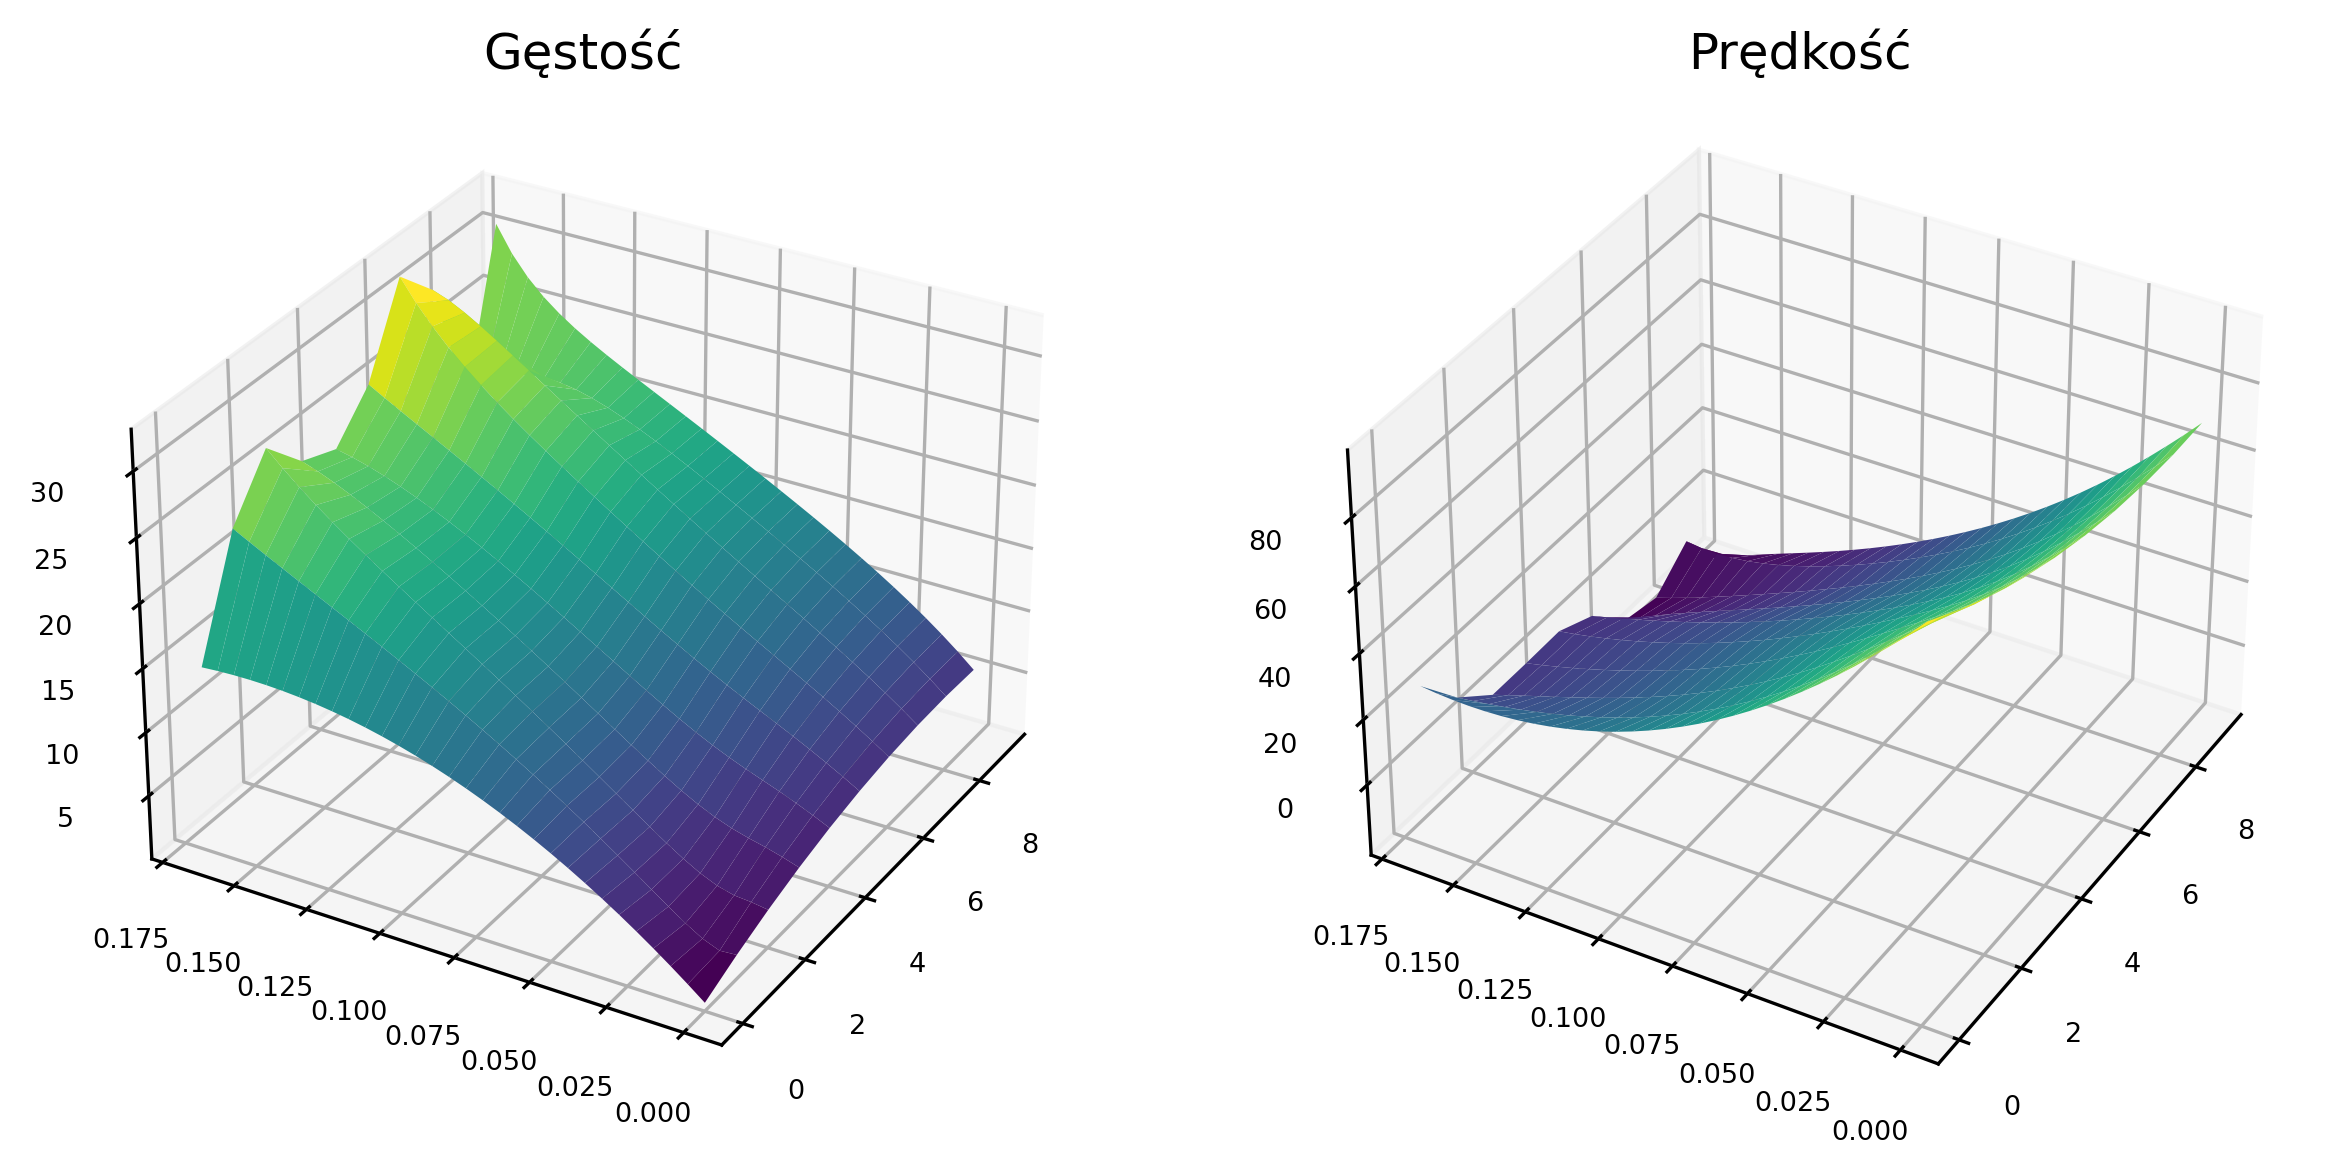

In [62]:
rho, v, cfl = crafted_solution((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Błąd rozwiązania w normie $L_1$

In [63]:
print("Błąd rozwiązania dla gęstości wynosi w przybliżeniu " + str(round(Lp_error(U, rho.transpose(), h, k), 3)))
print("Błąd rozwiązania dla prędkości wynosi w przybliżeniu " + str(round(Lp_error(V[:, 0:-1], v.transpose(), h, k), 3)))

Błąd rozwiązania dla gęstości wynosi w przybliżeniu 7.685
Błąd rozwiązania dla prędkości wynosi w przybliżeniu 5.471


#### Jak wyglądałoby to rozwiązanie niezmodyfikowanym schematem?

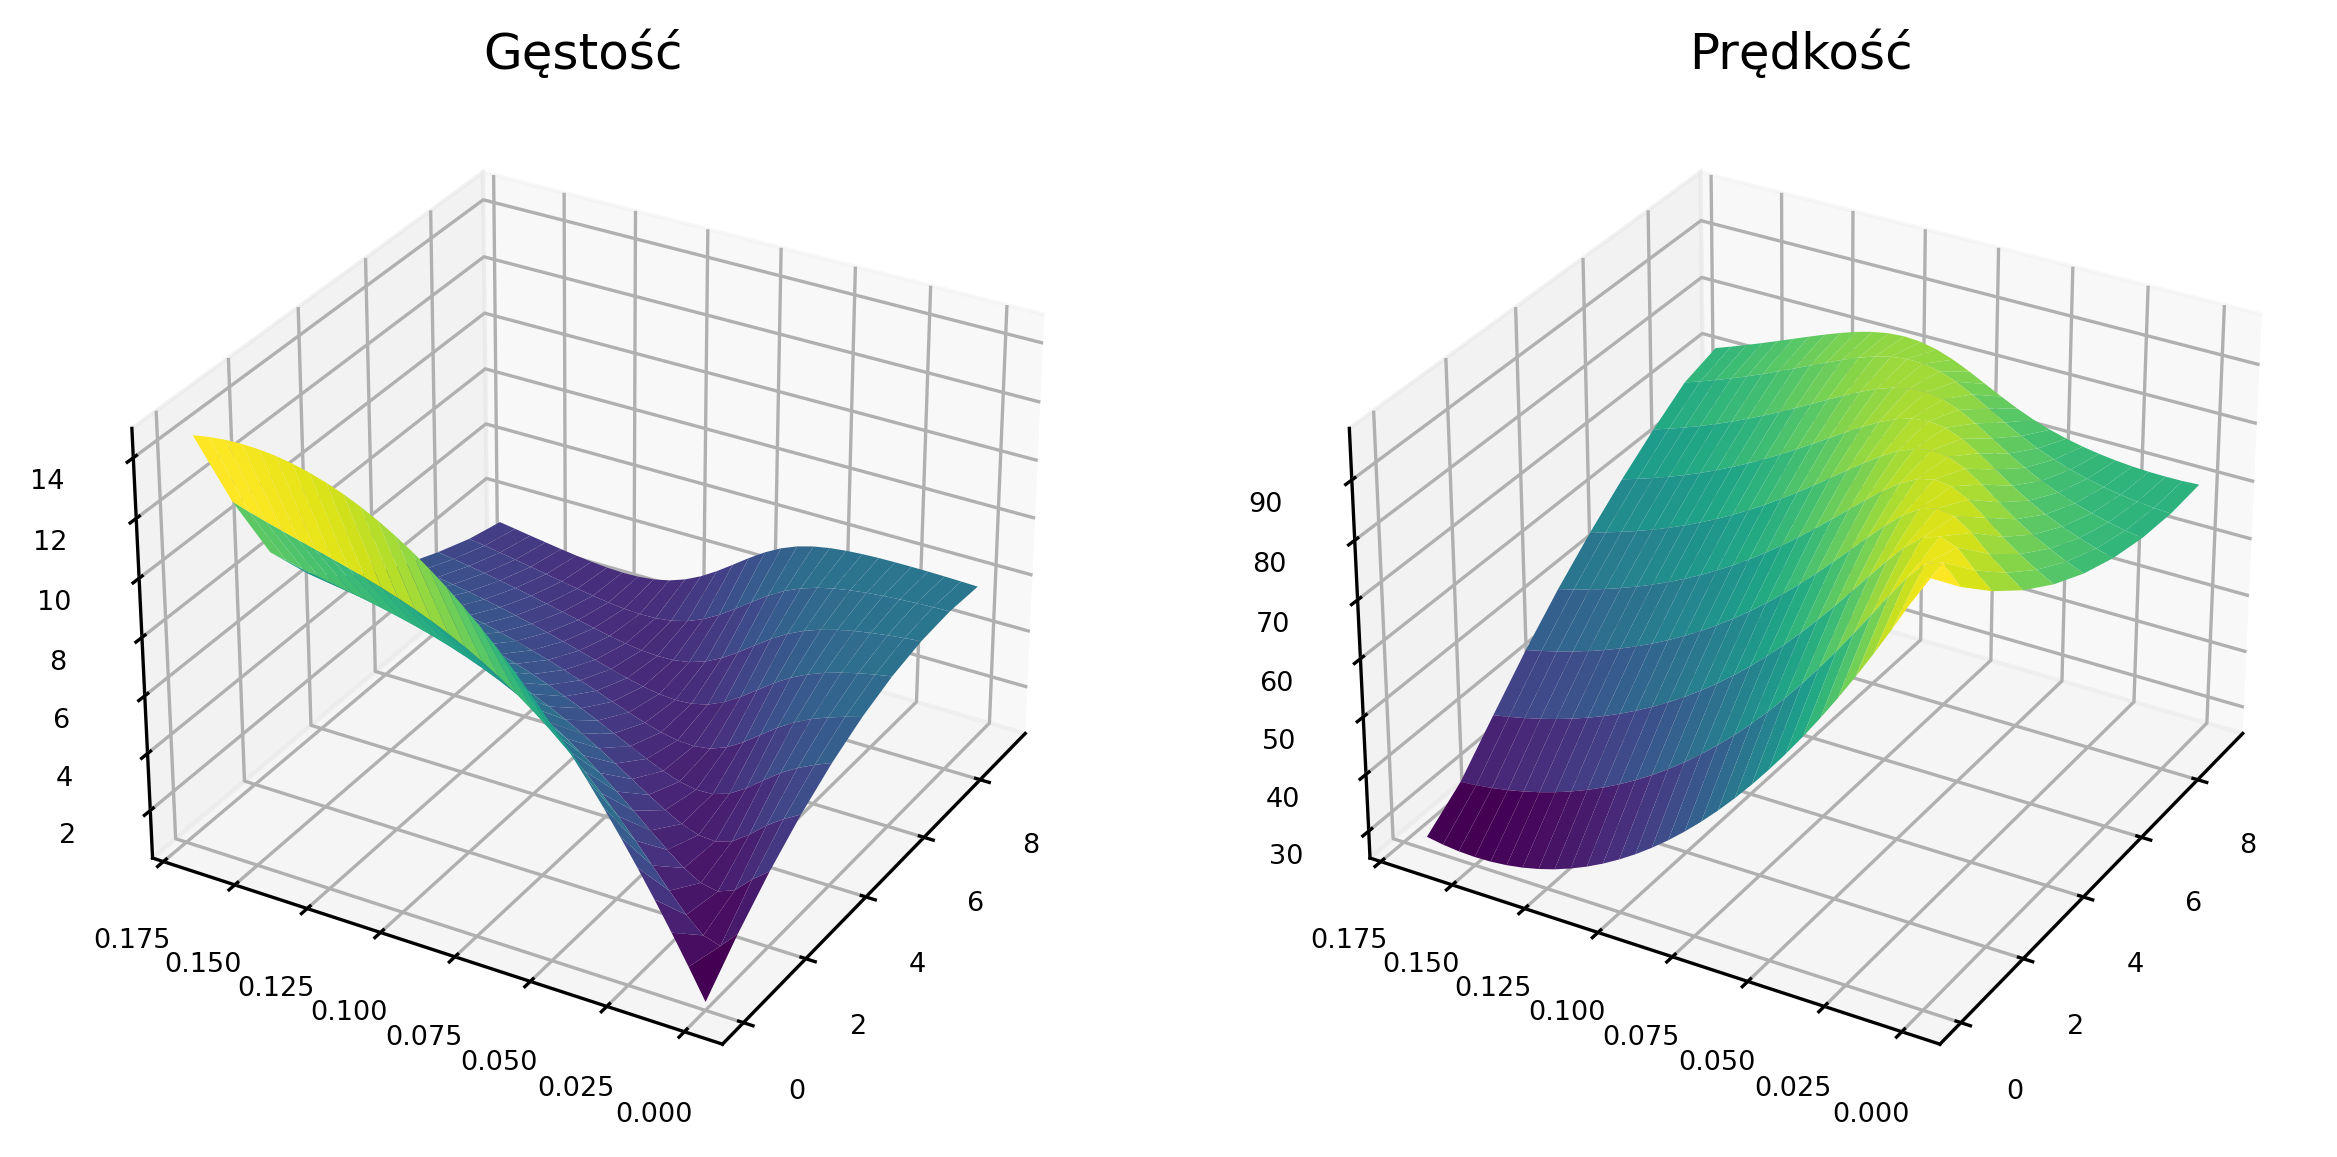

In [64]:
rho, v, cfl = FTBS((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m)

#### Porównanie błędów dla różnych wartości $k$ i $h$

In [65]:
h_test = [0.1, 0.2, 0.4, 0.8, 1.6]
errors_rho = []
errors_v = []
point_errors_t1 = []
point_errors_t2 = []
for i in range(len(h_test)):
    h = h_test[i]
    k = h/125
    space = np.arange(0, 16 + 0.01, h)
    time = np.arange(0, 0.128 + 0.0001, k)
    t_1 = int(0.0256/k)
    t_2 = int(0.0896/k)
    S, T = np.meshgrid(space, time)
    U = 20 -(S - 8)**2/12 - (T - 0.15)**2/0.0016
    V = 100*(1 - U/20)
    rho, v, cfl = crafted_solution((U[0, :], V[0, :]), (U[:, 0], V[:, 0]), k, h, rho_max, v_max, tau, chi, c0, l, m, plot=False)
    errors_rho.append(Lp_error(U[t_2, 0:-1], rho.transpose()[t_2, 0:-1], h, 1))
    errors_v.append(Lp_error(V[t_2, 0:-1], v.transpose()[t_2, :], h, 1))
    point_errors_t1.append(np.abs(U[t_1, :] - rho.transpose()[t_1, :]))
    point_errors_t2.append(np.abs(U[t_2, :] - rho.transpose()[t_2, :]))

/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:228: RuntimeWarning: overflow encountered in scalar multiply
  rho[s, t] = rho[s, t-1] + r*(v[s-1, t-1]*rho[s-1, t-1] - v[s, t-1]*rho[s, t-1]) \
/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:234: RuntimeWarning: overflow encountered in scalar multiply
  + r*v[s, t-1]*(v[s-1, t-1] - v[s, t-1]) - c0*r*(rho[s+1, t-1] - rho[s, t-1])/(chi + rho[s, t-1]) \
/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:228: RuntimeWarning: invalid value encountered in scalar subtract
  rho[s, t] = rho[s, t-1] + r*(v[s-1, t-1]*rho[s-1, t-1] - v[s, t-1]*rho[s, t-1]) \
/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:228: RuntimeWarning: invalid value encountered in scalar multiply
  rho[s, t] = rho[s, t-1] + r*(v[s-1, t-1]*rho[s-1, t-1] - v[s, t-1]*rho[s, t-1]) \
/mnt/c/Users/user/Documents/Licencjat/Praca-licencjacka/src.py:233: RuntimeWarning: invalid value encountered in scalar subtract
  v[s, t] = 

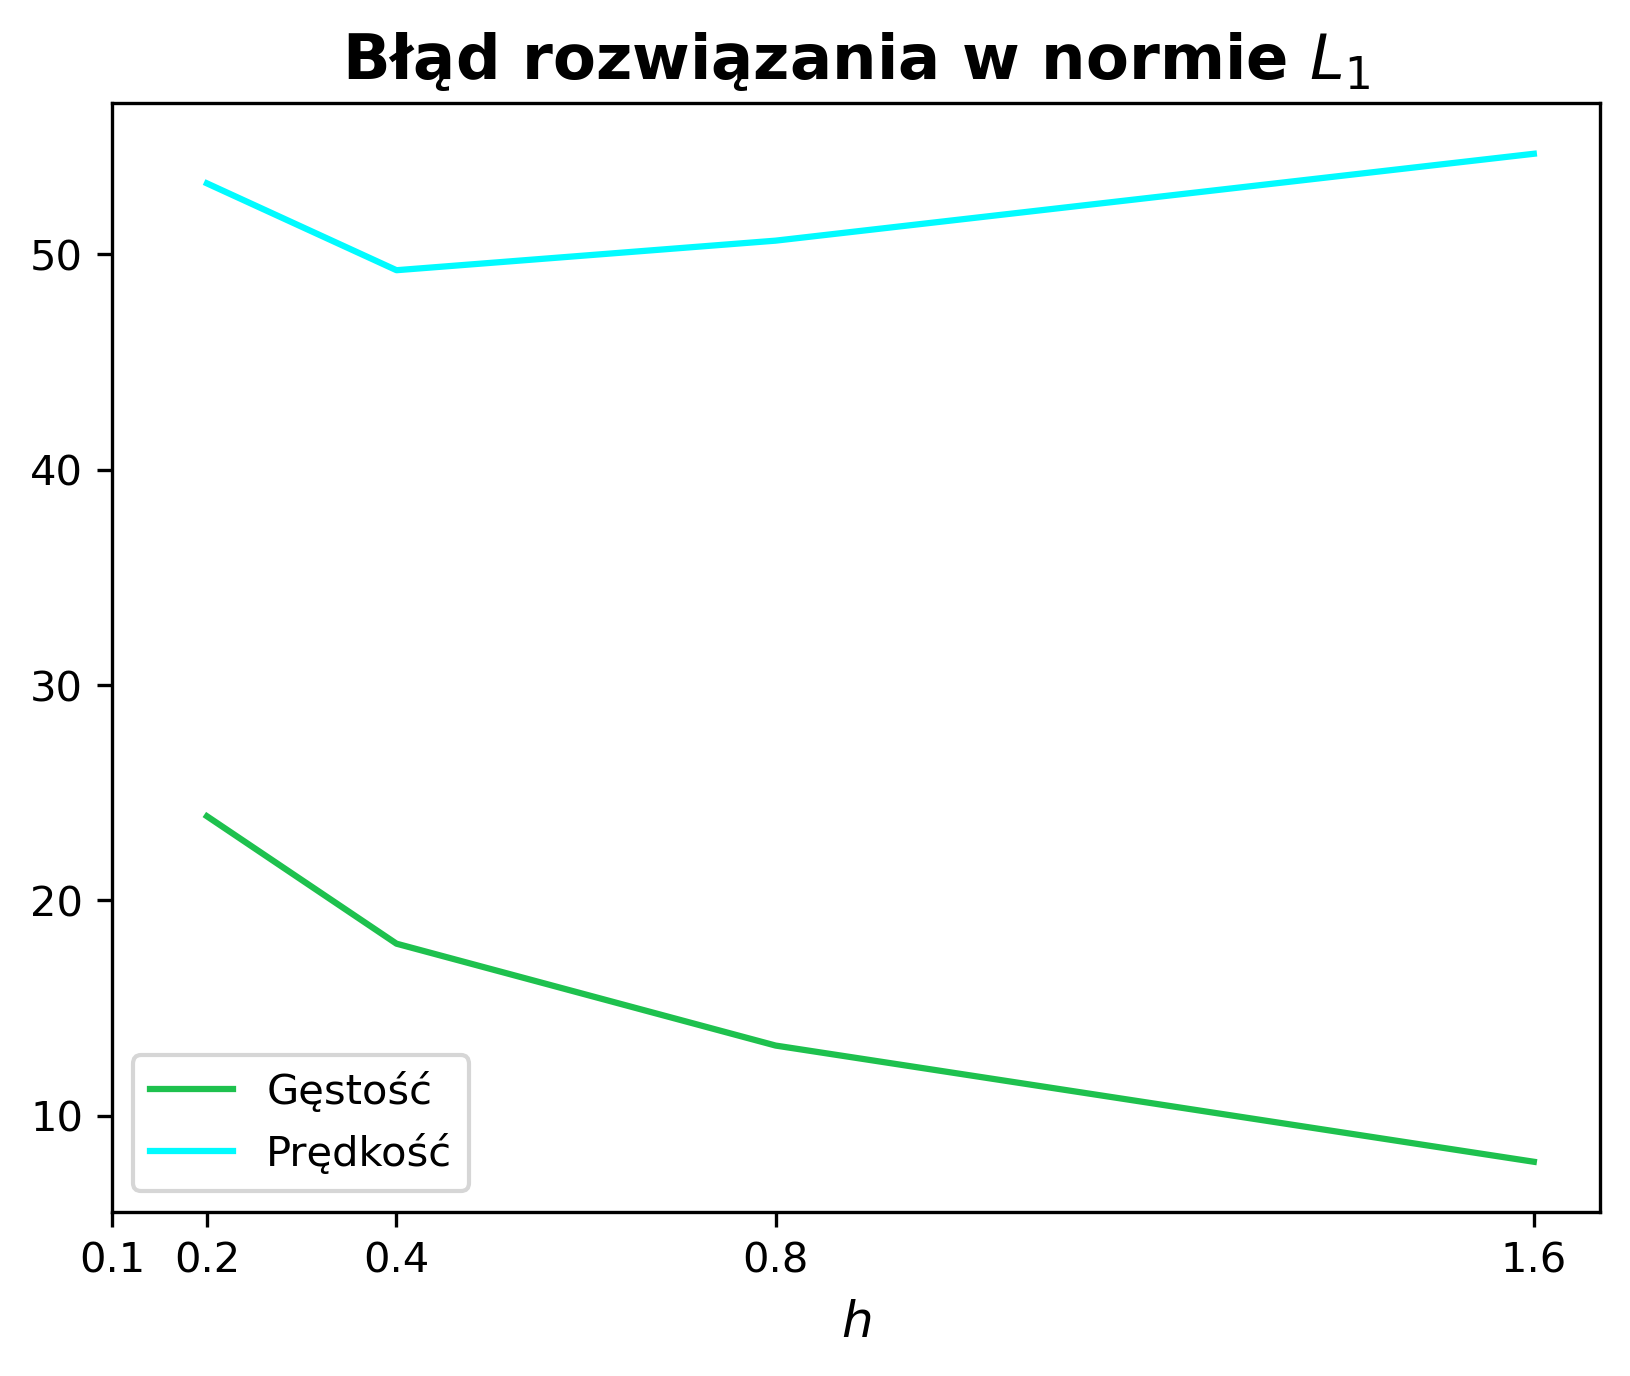

In [66]:
colors = ["#FF9719", "#1EC14E", "#FF3083", "#01FBFF", "#B632FF"]
plt.plot(h_test, errors_rho, label="Gęstość", color=colors[1])
plt.plot(h_test, errors_v, label="Prędkość", color=colors[3])
plt.xticks(ticks=h_test)
plt.title("Błąd rozwiązania w normie $L_1$", fontweight="bold", fontsize=15)
plt.xlabel("$h$", fontweight="bold", fontsize=12)

plt.legend()
plt.show()

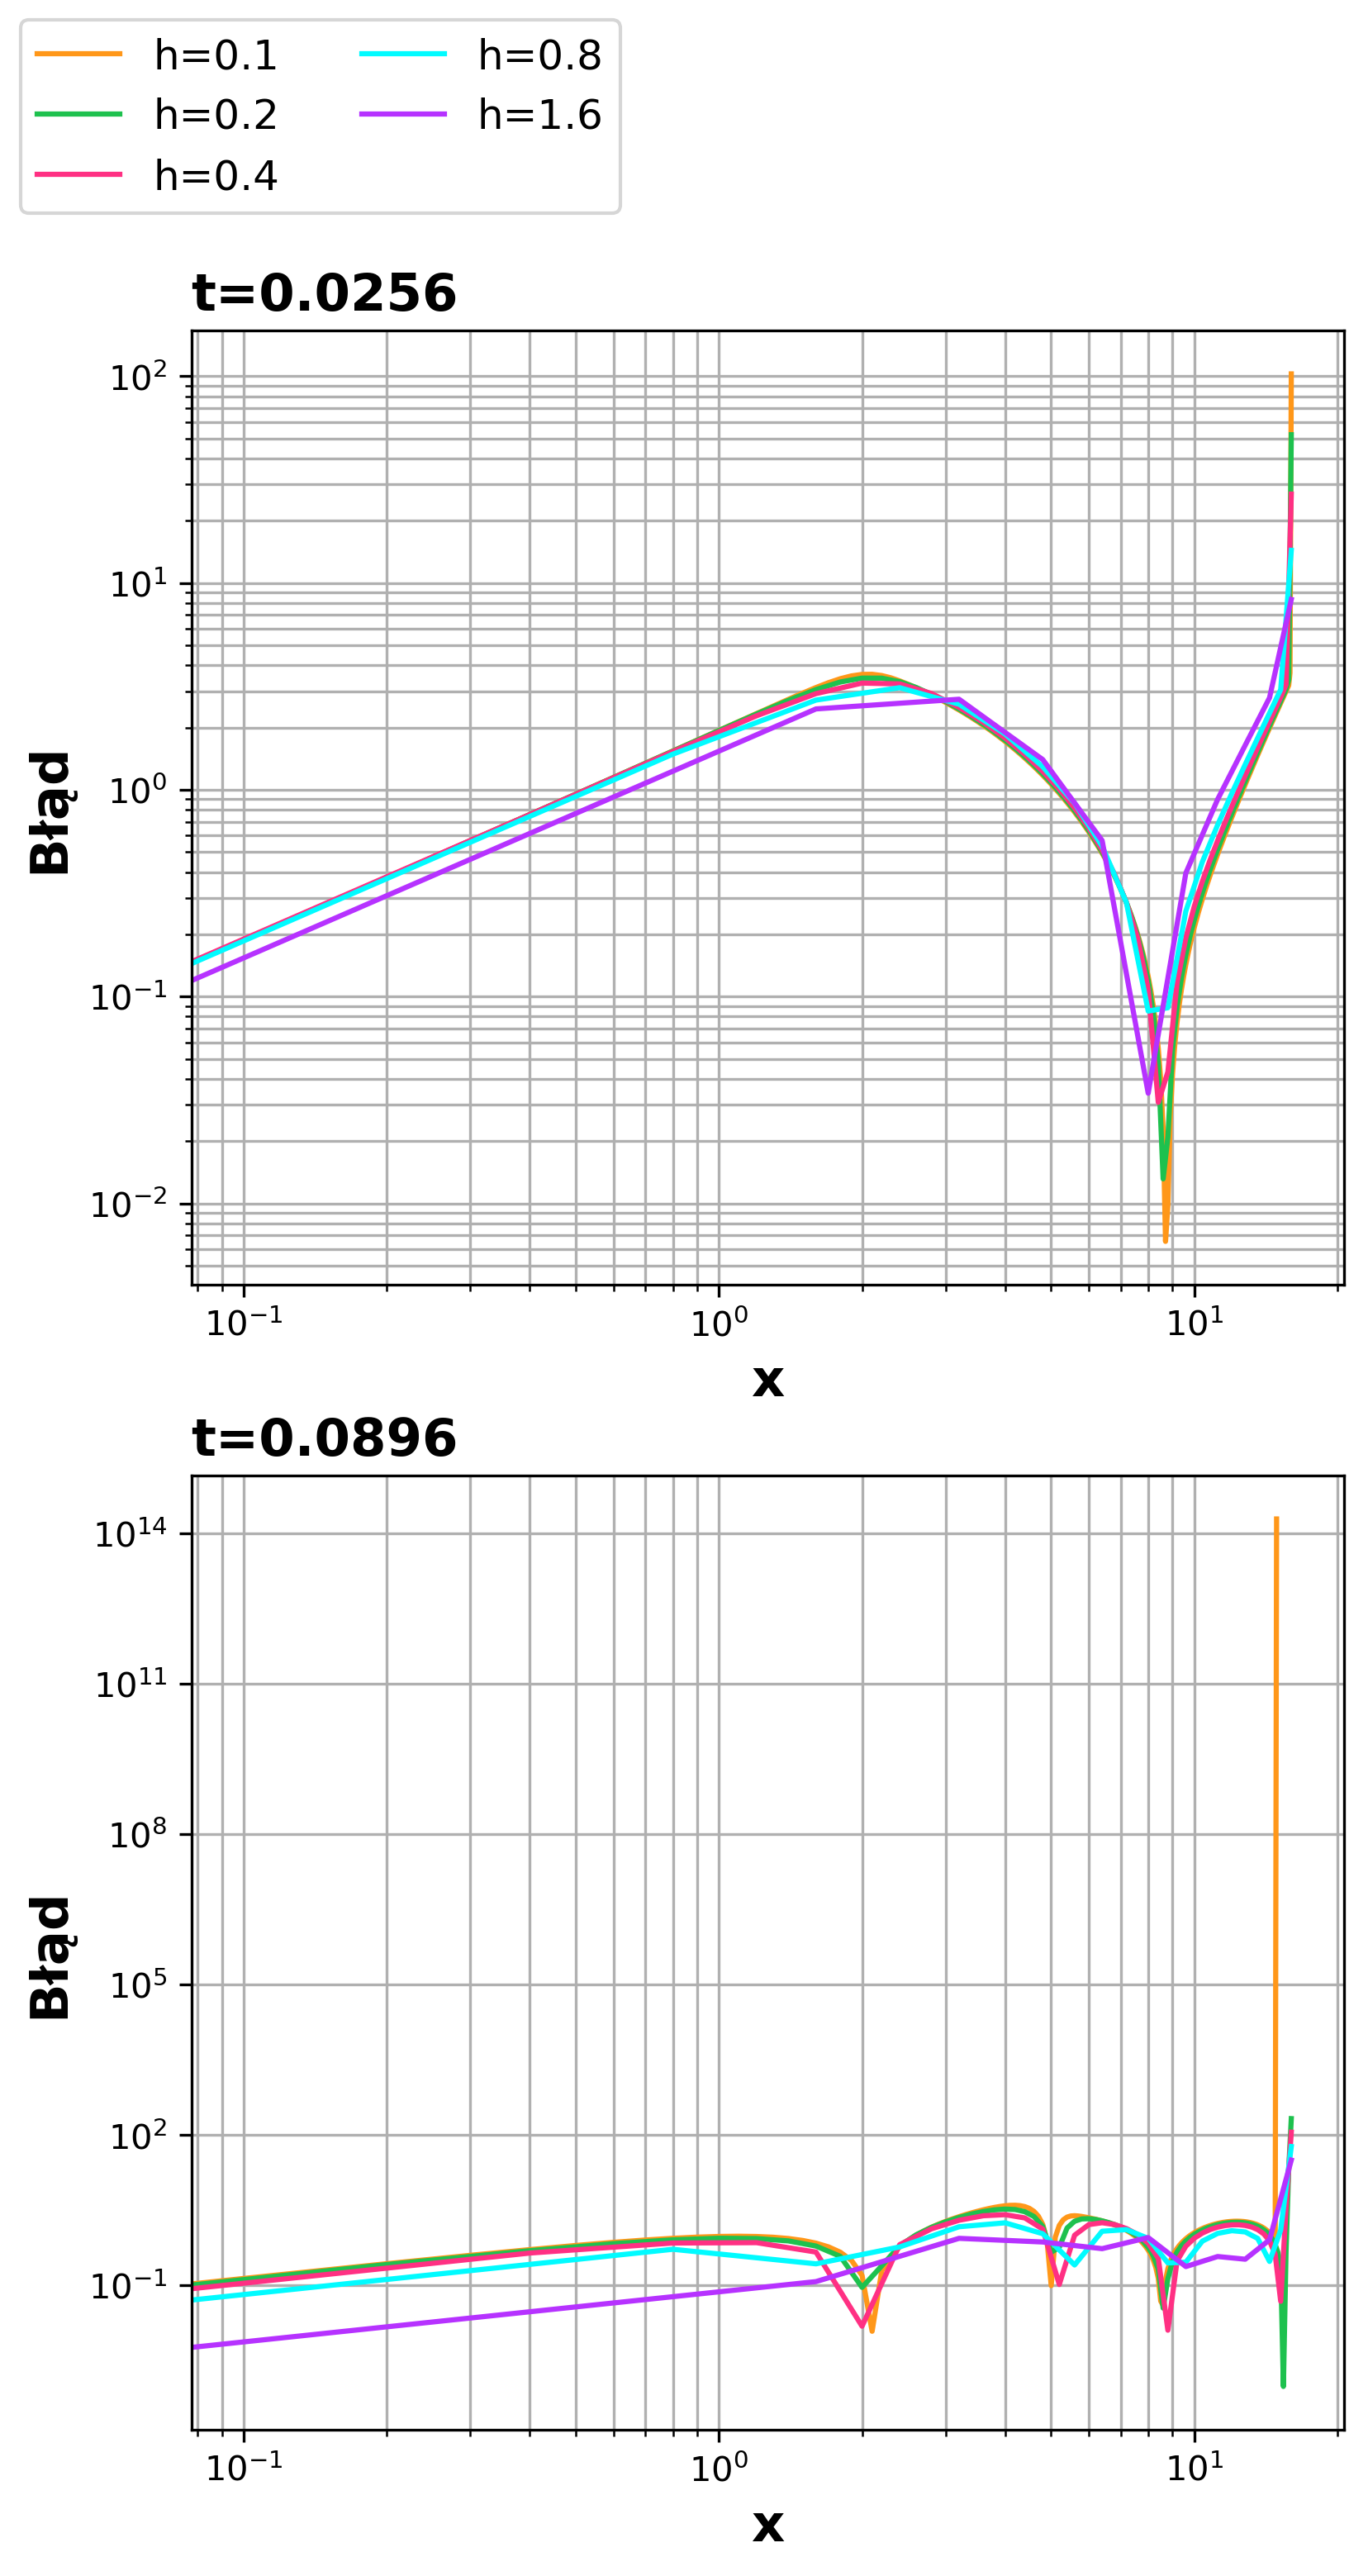

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(6, 11))
for i in range(len(point_errors_t1)):
    ax[0].plot(np.arange(0, 16 + 0.01, h_test[i]), point_errors_t1[i], label="h=" + str(h_test[i]), color=colors[i])
    ax[1].plot(np.arange(0, 16 + 0.01, h_test[i]), point_errors_t2[i], color=colors[i])

ax[0].set_xlabel("x", fontweight="bold", fontsize=15)
ax[0].set_ylabel("Błąd", fontweight="bold", fontsize=15)
ax[0].set_title("t="+str(time[t_1]), fontweight="bold", fontsize=15, loc='left')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].grid(which='both')

ax[1].set_xlabel("x", fontweight="bold", fontsize=15)
ax[1].set_ylabel("Błąd", fontweight="bold", fontsize=15)
ax[1].set_title("t="+str(time[t_2]), fontweight="bold", fontsize=15, loc='left')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].grid(which='both')

fig.legend(loc="upper left", fontsize=12, ncol=len(h_test)/2)
plt.show()